In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io


In [3]:
from google.colab import files
upload = files.upload()

Saving student_clustering.csv to student_clustering.csv


In [4]:
df = pd.read_csv(io.BytesIO(upload['student_clustering.csv']))

In [17]:
df.head()


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


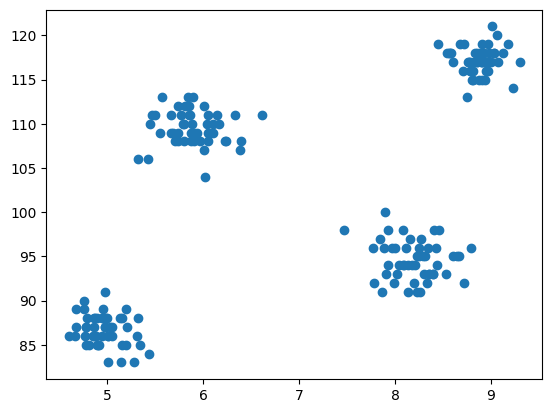

In [16]:
plt.scatter(df['cgpa'],df['iq'])

In [12]:
from sklearn.cluster import KMeans

In [18]:
wcss= []

for i in range(1,11):
  km = KMeans(n_clusters= i,n_init=10)
  km.fit_predict(df)
  wcss.append(km.inertia_)

In [19]:
wcss

[29957.898288000004,
 4184.141270000001,
 2362.713349,
 681.9696600000003,
 514.1616803171116,
 395.9605877691831,
 295.43918959431915,
 233.54082485509014,
 204.33441047547043,
 181.38797285135533]

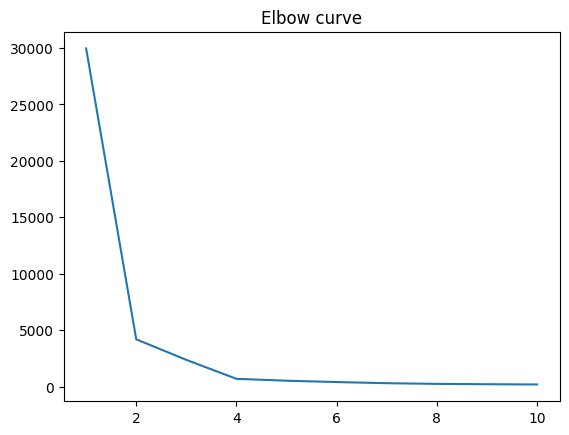

In [21]:
# now plot the elbow curve
plt.plot(range(1,11),wcss)
plt.title("Elbow curve")
plt.show()

In [22]:
X = df.iloc[:,:].values

In [24]:
kms = KMeans(n_clusters= 4,n_init=1)
kms.fit(X)

KMeans(n_clusters=4, n_init=1)

In [25]:
y_means = kms.predict(X)

In [33]:
X[y_means ==3,1]

array([88., 86., 88., 86., 87., 88., 87., 84., 85., 86., 83., 86., 87.,
       85., 83., 88., 85., 88., 86., 91., 86., 88., 89., 86., 90., 87.,
       87., 85., 87., 83., 86., 87., 85., 87., 87., 88., 88., 85., 86.,
       86., 86., 85., 88., 88., 89., 88., 88., 89., 85., 89.])

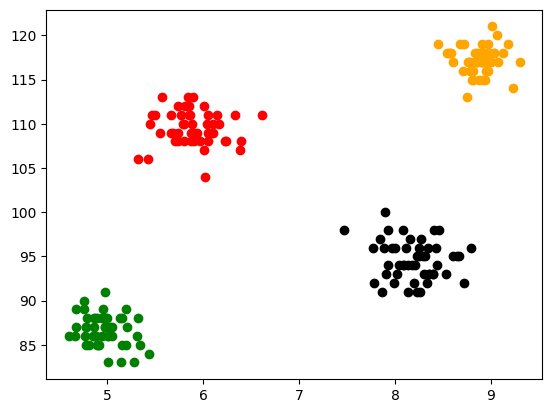

In [36]:
plt.scatter(X[y_means ==0,0],X[y_means ==0,1],c='red')
plt.scatter(X[y_means ==1,0],X[y_means ==1,1],c='black')
plt.scatter(X[y_means ==2,0],X[y_means ==2,1],c='orange')
plt.scatter(X[y_means ==3,0],X[y_means ==3,1],c='green')


# K-Means in 3d dataset

In [37]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [40]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0],y=X[:,1], z= X[:,2])
fig.show()

In [41]:
wcss =[]

for i in range(1,21):
  km = KMeans(n_clusters=i,n_init= 20)
  km.fit_predict(X)
  wcss.append(km.inertia_)

In [42]:
wcss

[11143.784324503365,
 4122.409557603532,
 2163.269450436297,
 593.2516262404544,
 540.6838089917444,
 493.31586224038756,
 453.37510202417286,
 422.47570498933135,
 395.05086968798105,
 364.52762854524013,
 340.50133648917006,
 321.6414830658859,
 304.51304510969237,
 286.9052270696185,
 270.1183538770956,
 260.5946411711243,
 243.9590809002903,
 236.39237792115736,
 226.17541266882142,
 216.26464890488808]

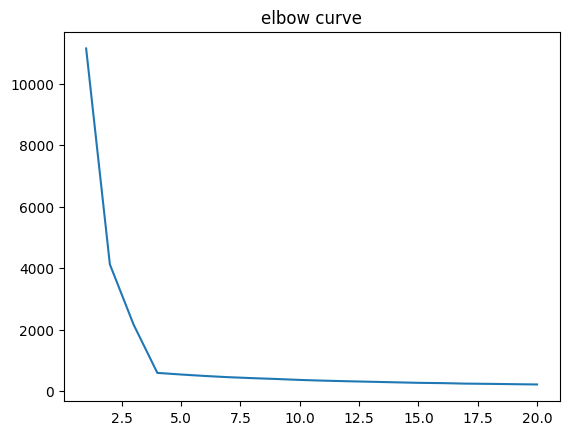

In [44]:
plt.plot(range(1,21),wcss)
plt.title("elbow curve")
plt.show()

In [45]:
kms = KMeans(n_clusters= 4, n_init= 'auto')

In [47]:
y_pred =  kms.fit_predict(X)

In [48]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [49]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()